In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

from ampel.contrib.groupname.t2.T2ExamplePolyFit import T2ExamplePolyFit

base_config = {
    "fitFunction" : "polyfit"
}

myt2 = T2ExamplePolyFit(logger=logger, base_config=base_config)

In [2]:
import urllib.request

small_test_tar_url = 'https://ztf.uw.edu/alerts/public/ztf_public_20181129.tar.gz'
small_test_tar_path = 'ztf_public_20181129.tar.gz'

urllib.request.urlretrieve(small_test_tar_url, small_test_tar_path)

('ztf_public_20181129.tar.gz', <http.client.HTTPMessage at 0x7f39b3475f60>)

In [3]:
from ampel.pipeline.t0.load.TarAlertLoader import TarAlertLoader

tb_walker = TarAlertLoader(small_test_tar_path)

In [4]:
from ampel.pipeline.t0.load.AlertSupplier import AlertSupplier
from ampel.ztf.pipeline.t0.load.ZIAlertShaper import ZIAlertShaper

alert_supplier = AlertSupplier(tb_walker, ZIAlertShaper.shape, serialization="avro")
alert = next(alert_supplier)

In [5]:
from ampel.ztf.utils.ZIAlertUtils import ZIAlertUtils

lc = ZIAlertUtils._create_lc(alert['pps'], alert['uls'])

run_config = {
    "degree" : 5
}

out = myt2.run(lc, run_config)
print(out)

/home/nmiranda/workspace/ampel/src/Ampel-contrib-sample/ampel/contrib/groupname/t2/T2ExamplePolyFit.py:140: RankWarning: Polyfit may be poorly conditioned
  p = self.fit_function(x, y, run_config['degree'])
Please use 'self.logger' for logging
By doing so, log entries will be automatically recorded into the database


{'polyfit': [-1.0961370521132026e-22, 5.3897048815435494e-17, 5.299984481164758e-10, 0.0013029547743927943, 800.7921093164033, -9843720396.91712], 'chi2': 0.6192191186091804}


INFO:ampel.ztf.view.AmpelAlertPlotter:Initialized AmpelAlertPlotter in interactive mode.


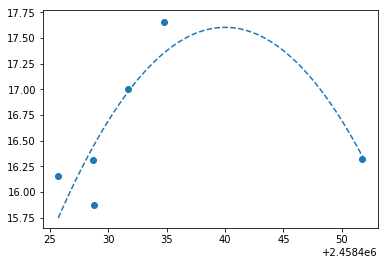

In [6]:
from ampel.ztf.view.AmpelAlertPlotter import AmpelAlertPlotter
import numpy as np

lc_plot = AmpelAlertPlotter(interactive=True)

obs_date = sorted(lc.get_values('obs_date'))
mag = sorted(lc.get_values('mag'))

fit = np.poly1d(out['polyfit'])

#ax = lc_plot.scatter_plot(lc, 'obs_date', 'mag')
ax = plt.axes()
ax.scatter(*zip(*lc.get_tuples('obs_date', 'mag')))
x_range = np.linspace(obs_date[0], obs_date[-1], 100)
ax.plot(x_range, fit(x_range), '--')

In [7]:
import os
os.remove(small_test_tar_path)